**RFC**

In [1]:
!pip install python-mnist

In [5]:
!pip install numpy scikit-learn matplotlib --user

ok important points
- when we run this file or cell first time it generate two files
1. MNIST_RFC.pickel file
 - it's for not doing process another time what process? the process of converting MNIST dataset to python friendly data its done in first time so pickel file do this faster and effectively

2. summery.log
 - its typically log file like line by line logs what the program is doing loading data and predicting taking random numbers from MNIST datasets and confusion matrix and accuracy and other things that code is doing in back so you can check it

# RFC

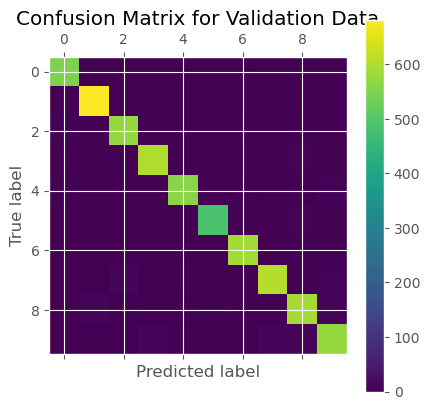

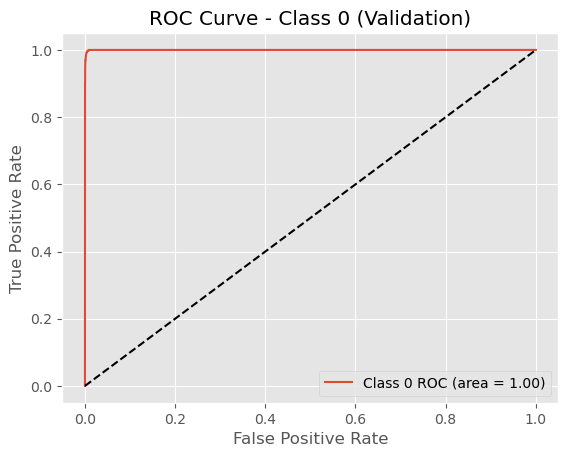

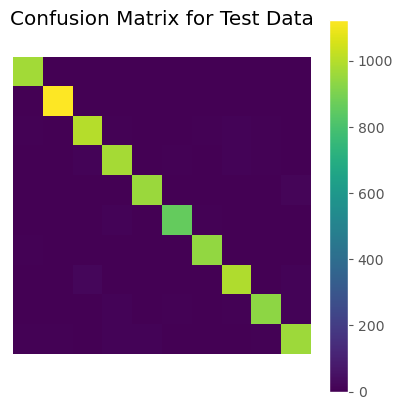

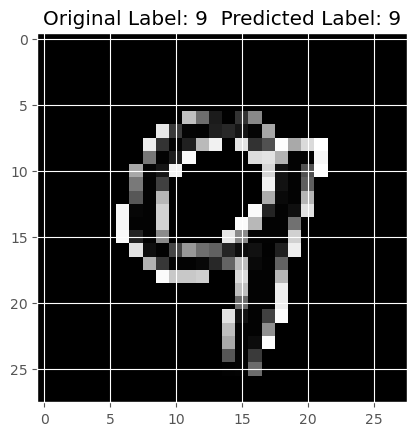

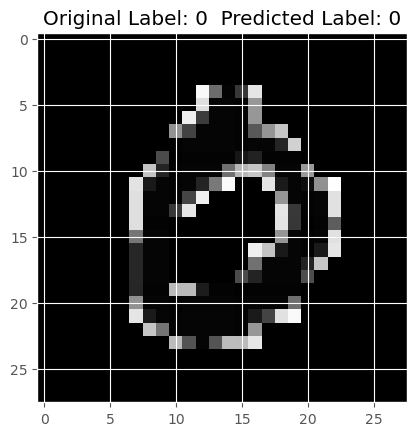

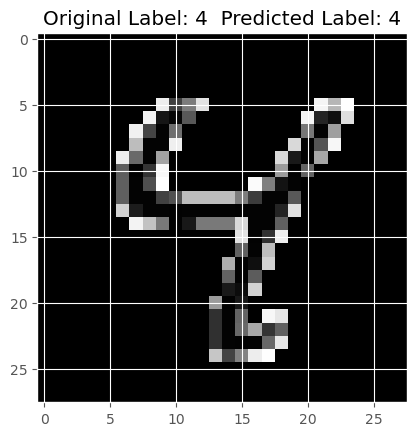

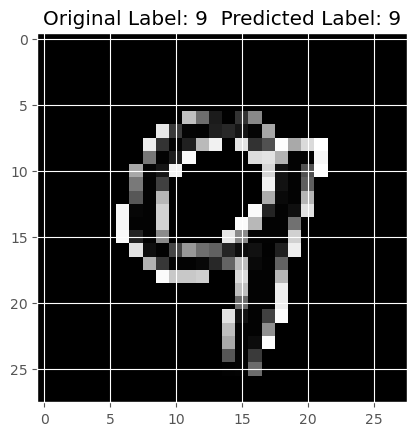

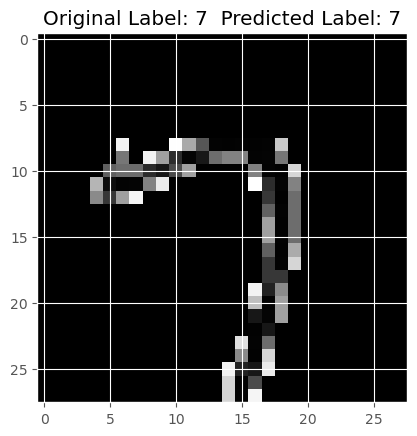

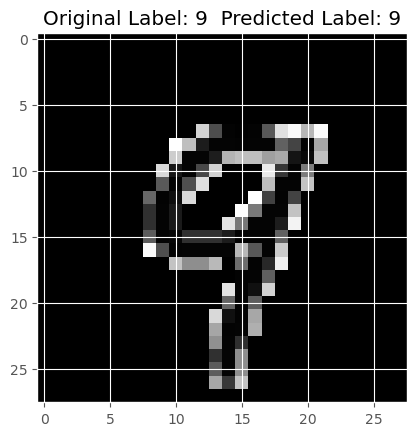

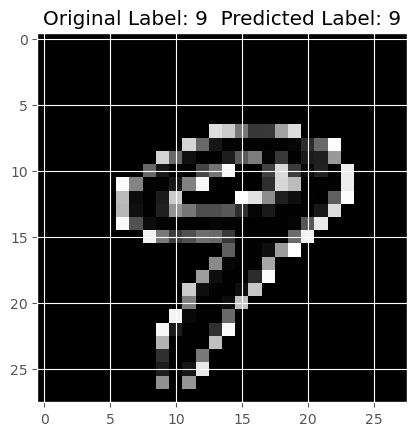

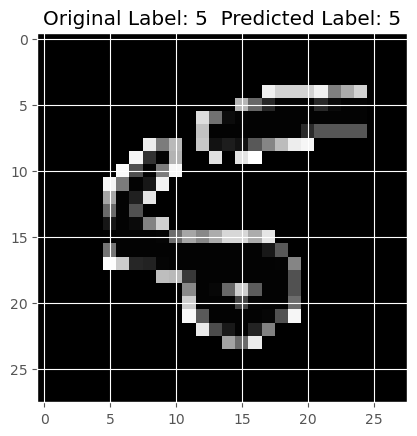

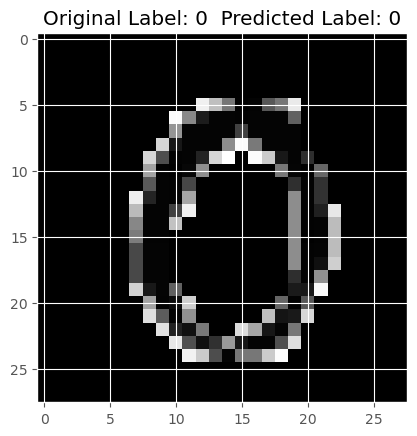

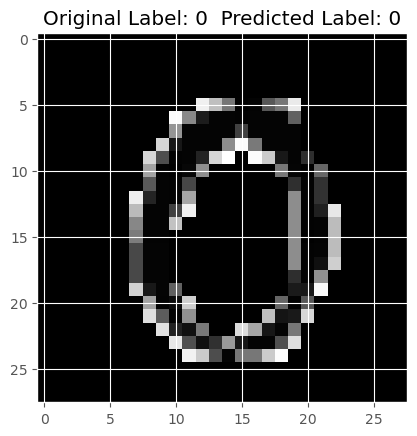

In [10]:
# Random Forest Classifier 

import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from mnist import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

old_stdout = sys.stdout
log_file = open("summaryRFC.log", "w")
sys.stdout = log_file

print('\nLoading MNIST Data...')
data = MNIST('./MNIST_Dataset_Loader/dataset/')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

# Features and Labels
X = train_img
y = train_labels

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

print('\nRandom Forest Classifier with n_estimators = 200, n_jobs = -1, max_depth = 25')
clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=25)
clf.fit(X_train, y_train)

# Save classifier
with open('MNIST_RFC.pickle', 'wb') as f:
    pickle.dump(clf, f)

# Load classifier
pickle_in = open('MNIST_RFC.pickle', 'rb')
clf = pickle.load(pickle_in)

# Accuracy on validation split
print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)

print('\nRFC Trained Classifier Confidence: ', confidence)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC-AUC Score for Validation
print('\nCalculating ROC-AUC for Validation Data...')
y_test_bin = label_binarize(y_test, classes=range(10))
y_score = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print("Multi-class ROC-AUC Score (OVR):", auc_score)

# Plot ROC curve for class '0' as an example
fpr, tpr, _ = roc_curve(y_test_bin[:, 0], y_score[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Class 0 ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Class 0 (Validation)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Evaluate on full test data
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)

print('\nPredicted Labels for Test Images: ', test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()

# Show Test Images with Predicted and True Labels
a = np.random.randint(1, 30, 10)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()



# SVM

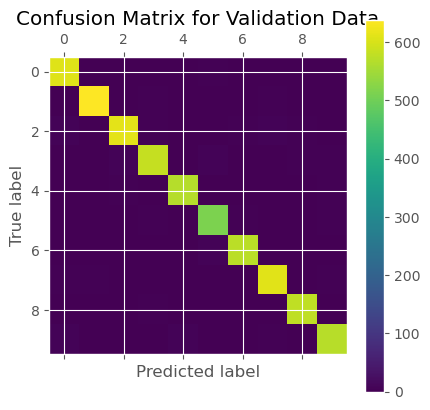

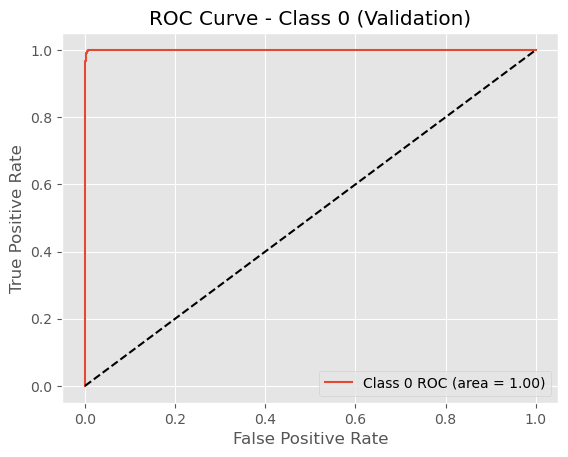

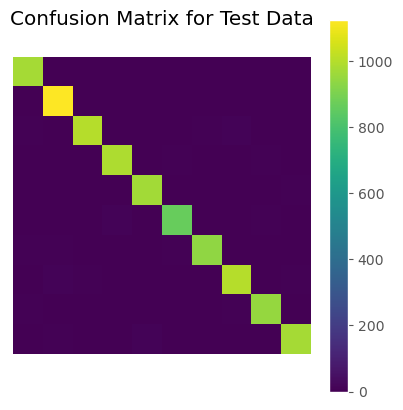

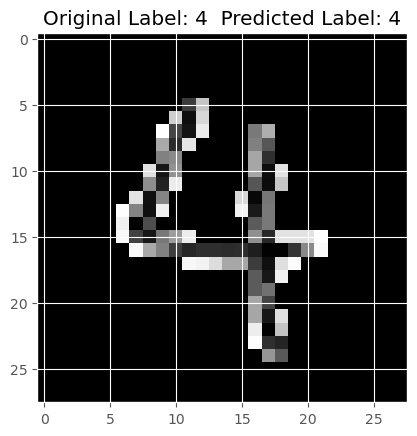

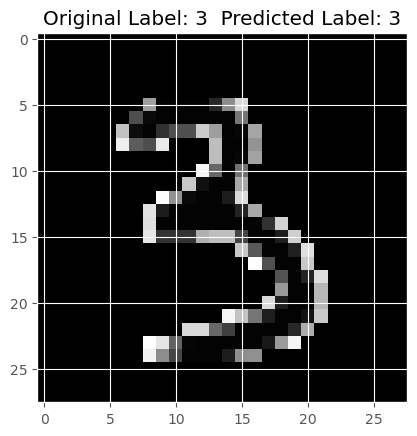

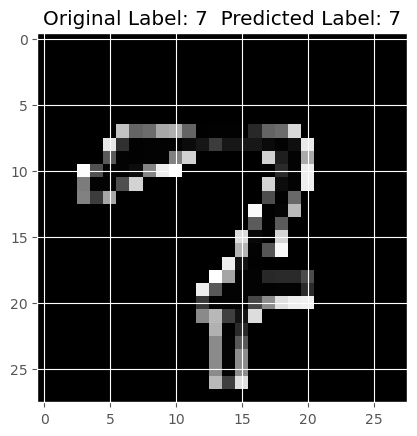

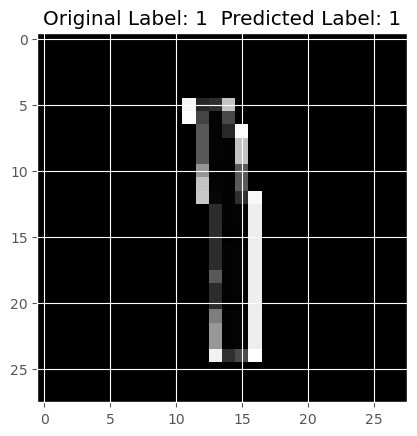

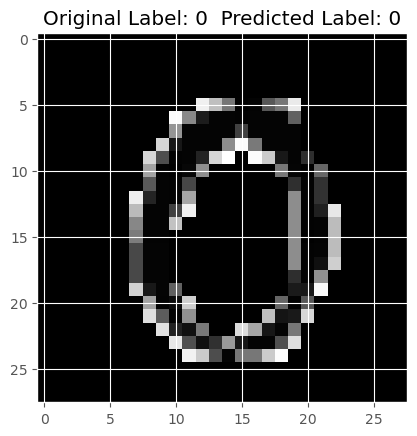

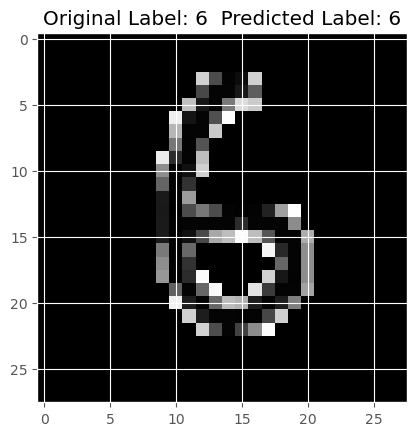

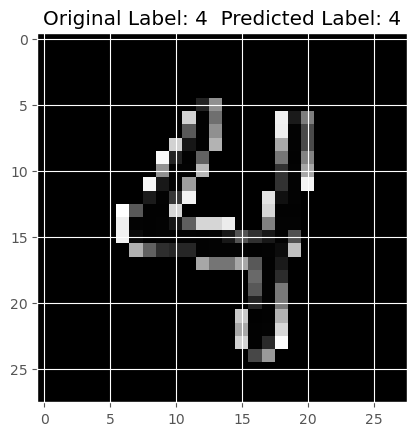

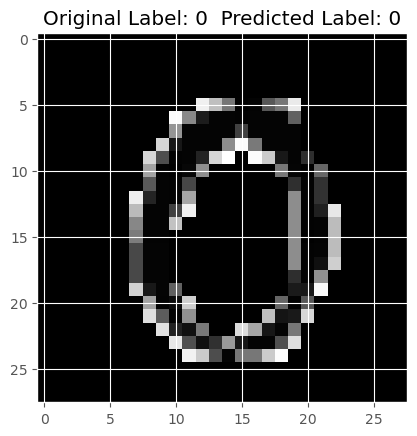

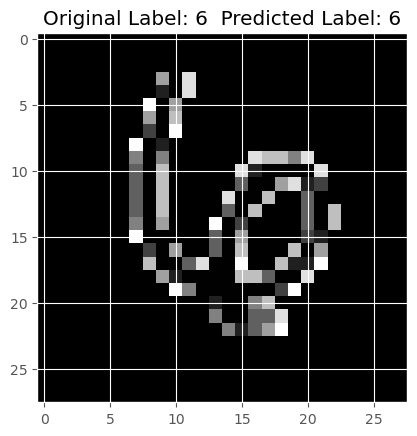

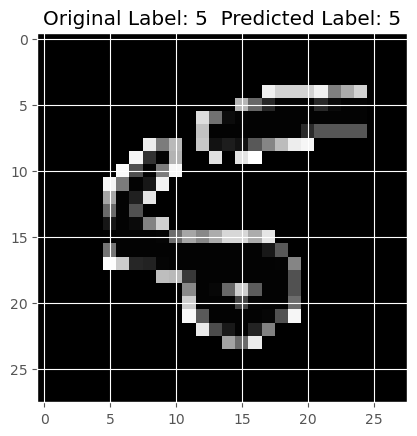

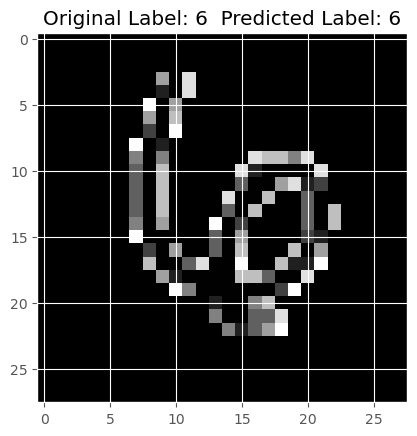

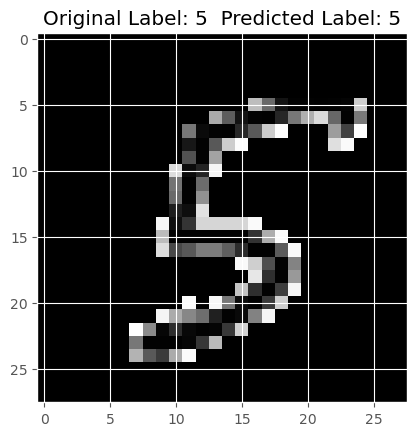

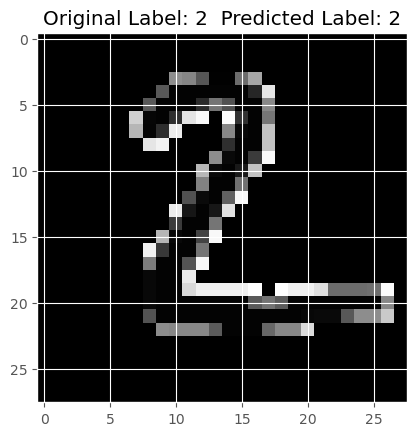

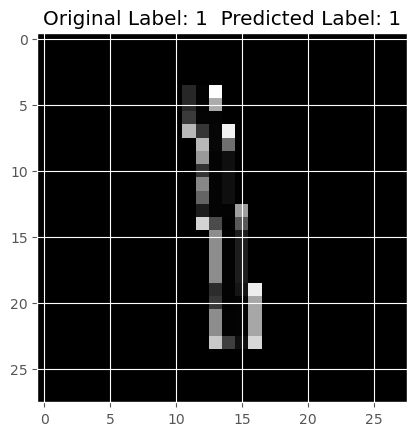

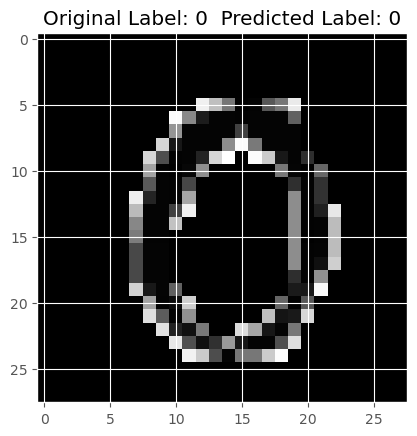


Accuracy of Classifier on Test Images:  0.978

Confusion Matrix for Test Data: 
 [[ 973    0    1    1    0    3    0    0    2    0]
 [   0 1126    2    1    1    0    2    0    3    0]
 [   7    2 1002    0    2    0    7    9    3    0]
 [   0    2    3  986    0    6    0    3    6    4]
 [   1    0    2    0  968    0    3    0    0    8]
 [   2    0    2   11    1  863    4    1    6    2]
 [   5    5    1    0    3    5  937    0    2    0]
 [   0   10    8    2    1    0    0 1000    0    7]
 [   5    0    1    3    2    4    1    6  950    2]
 [   4    5    2    3   11    3    1    2    3  975]]


In [1]:
# SVM Classifier with ROC-AUC

import sys
import numpy as np
import pickle
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from mnist import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Save all the Print Statements in a Log file.
old_stdout = sys.stdout
log_file = open("summarySVM.log", "w")
sys.stdout = log_file

# Load MNIST Data
print('\nLoading MNIST Data...')
data = MNIST('./MNIST_Dataset_Loader/dataset/')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

# Features and Labels
X = train_img
y = train_labels

# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

# Train SVM Classifier (with probability enabled)
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')
clf = svm.SVC(gamma=0.1, kernel='poly', probability=True)
clf.fit(X_train, y_train)

with open('MNIST_SVM.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_SVM.pickle', 'rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)

print('\nSVM Trained Classifier Accuracy: ', acc)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Images: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC-AUC Score for Validation
print('\nCalculating ROC-AUC for Validation Data...')
y_test_bin = label_binarize(y_test, classes=range(10))
y_score = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print("Multi-class ROC-AUC Score (OVR):", auc_score)

# Plot ROC curve for class '0' as an example
fpr, tpr, _ = roc_curve(y_test_bin[:, 0], y_score[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Class 0 ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Class 0 (Validation)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Predictions on test data
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)

print('\nPredicted Labels for Test Images: ', test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()

# Show some test images with predictions
a = np.random.randint(1, 40, 15)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)


# KNN

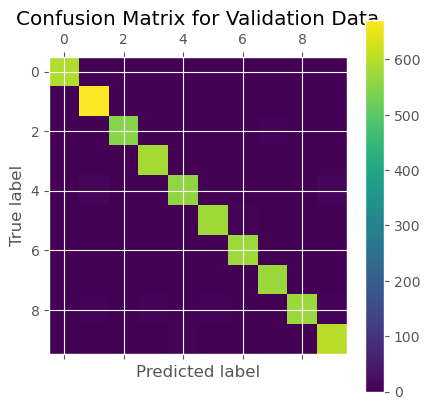

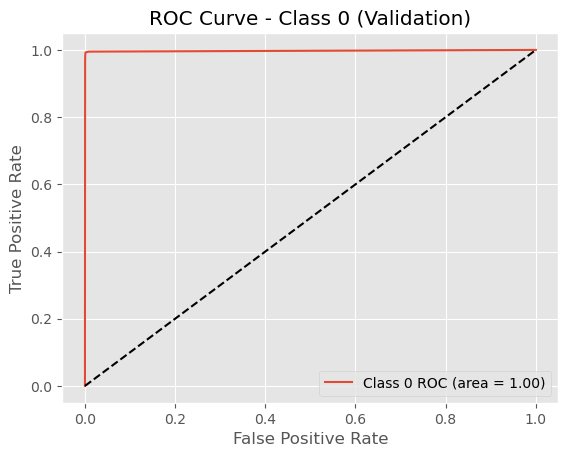

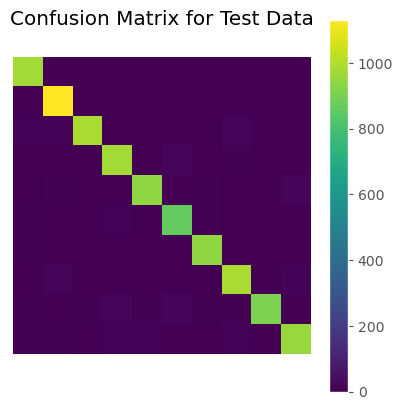

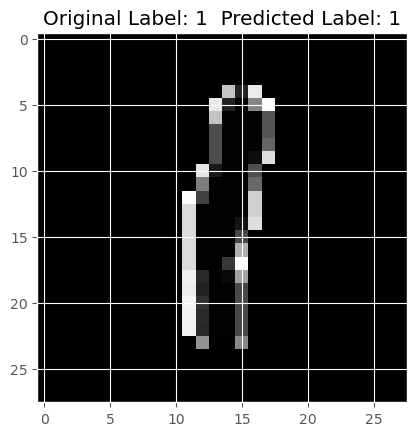

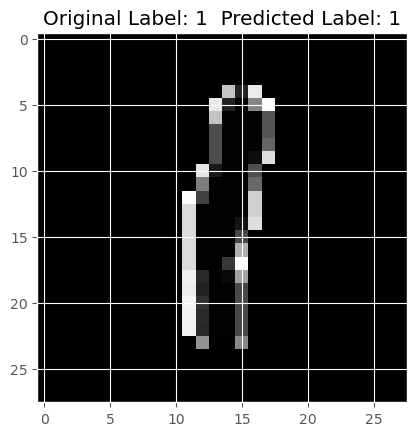

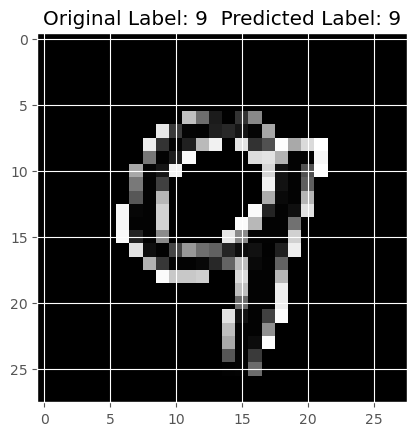

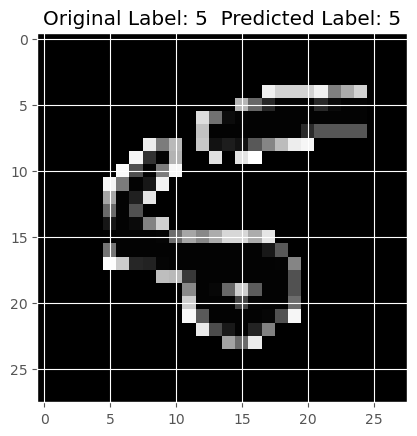

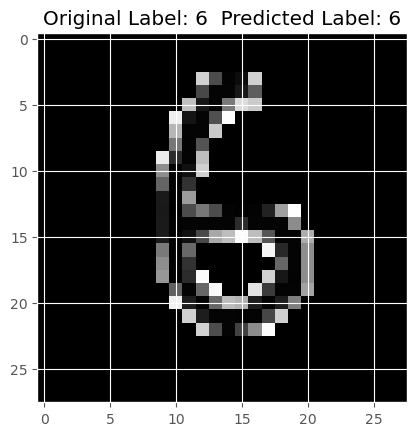

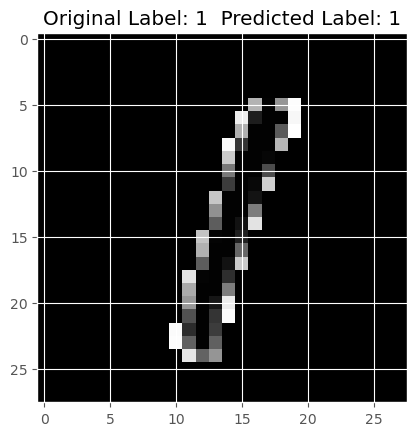

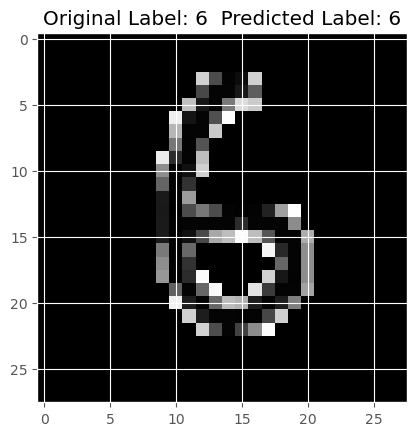

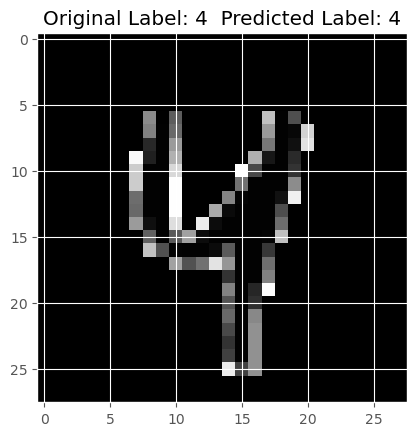

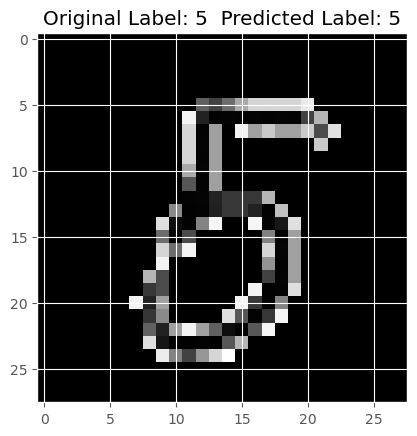

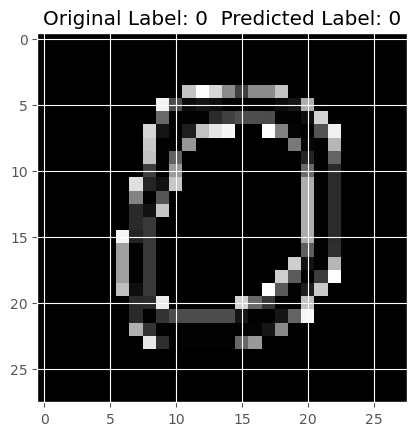

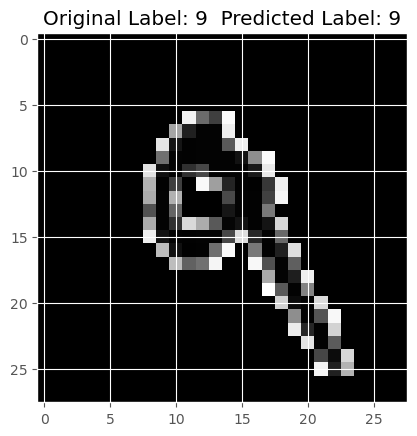

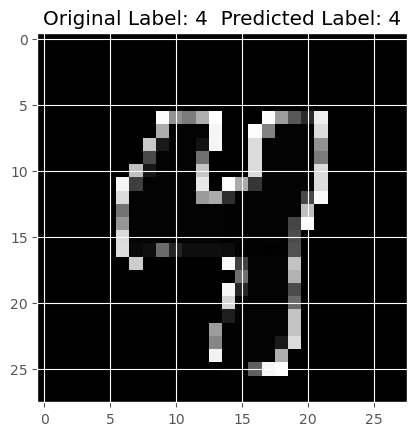

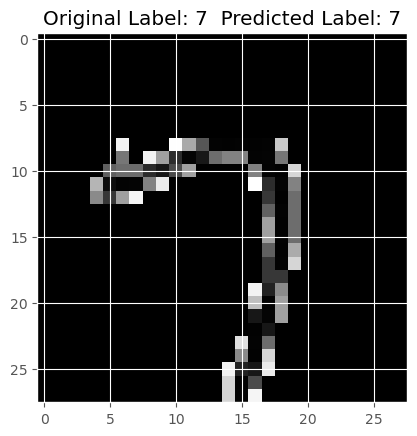

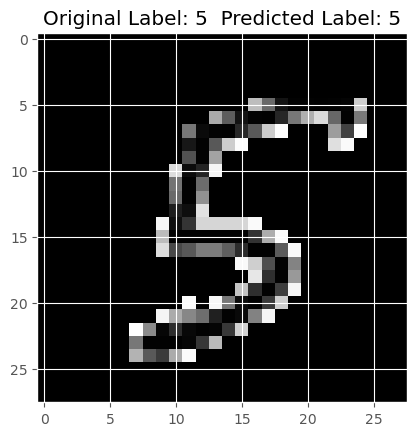

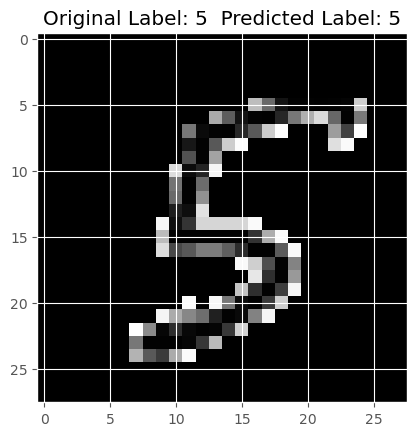

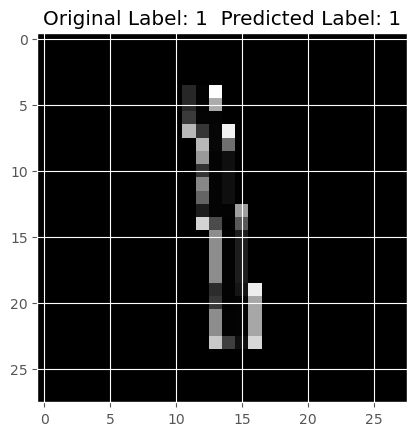

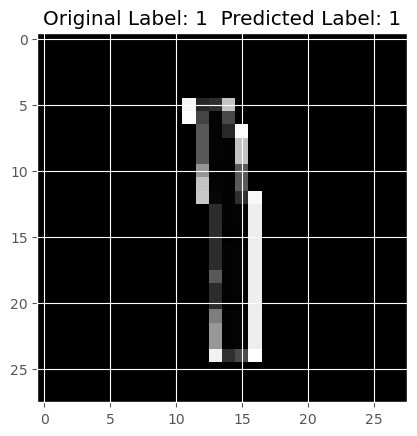

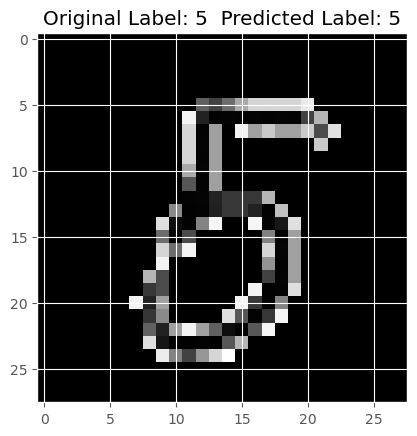

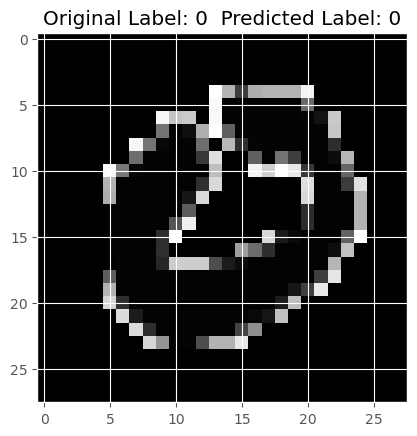

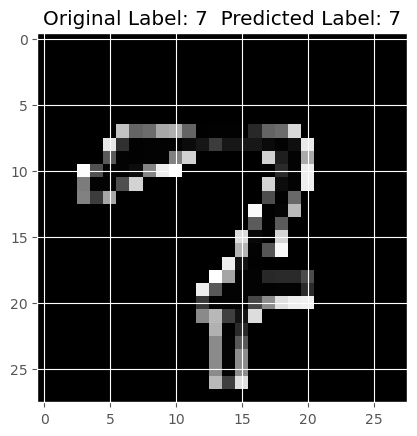


Accuracy of Classifier on Test Images:  0.9675

Confusion Matrix for Test Data: 
 [[ 973    1    1    0    0    2    2    1    0    0]
 [   0 1132    2    0    0    0    0    0    0    1]
 [  11    9  988    2    1    0    1   16    4    0]
 [   0    3    4  975    1   14    0    7    3    3]
 [   2    7    0    0  944    0    5    2    1   21]
 [   5    0    0   12    2  862    6    1    1    3]
 [   5    3    0    0    2    2  946    0    0    0]
 [   0   22    4    0    2    0    0  989    0   11]
 [   8    4    5   14    7   14    5    6  907    4]
 [   5    7    3    9    9    3    1   11    2  959]]


In [2]:
# KNN Classifier with ROC-AUC

import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from mnist import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


old_stdout = sys.stdout
log_file = open("summaryKNN.log", "w")
sys.stdout = log_file


print('\nLoading MNIST Data...')
data = MNIST('./MNIST_Dataset_Loader/dataset/')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


# Features and Labels
X = train_img
y = train_labels

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10)
clf.fit(X_train, y_train)

with open('MNIST_KNN.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_KNN.pickle', 'rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)

print('\nKNN Trained Classifier Confidence: ', confidence)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC-AUC Calculation
print('\nCalculating ROC-AUC for Validation Data...')
y_test_bin = label_binarize(y_test, classes=range(10))
y_score = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print("Multi-class ROC-AUC Score (OVR):", auc_score)

# Plot ROC curve for class 0
fpr, tpr, _ = roc_curve(y_test_bin[:, 0], y_score[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Class 0 ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Class 0 (Validation)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Predictions on Test Data
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)

print('\nPredicted Labels for Test Images: ', test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()

# Show Test Images with Predictions
a = np.random.randint(1, 50, 20)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)